**Librerías**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import seaborn as sns

from tensorflow.keras.layers import  Dense
from tensorflow.keras.models import Sequential

#**Ejercicio clasificación**

##**Funciones**

In [ ]:
def limpieza(df):
  df = df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

  df['Sex'] = df['Sex'].map({
    'male':1,
    'female':2
  })

  df['Embarked'] = df['Embarked'].map({
    'Q':1,
    'S':2,
    'C':3
  })

  mean_age= df['Age'].mean()
  df['Age'].fillna(mean_age,inplace=True)

  df_cleaned = df.dropna(subset=['Embarked'])

  return df_cleaned




##**Dataset**

In [2]:
df = pd.read_csv('/content/train (2).csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<ipython-input-5-a494a59f9abe>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True,null_counts=True)


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_cleaned= limpieza(df)
print(df_cleaned.info(verbose=True,null_counts=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 62.5 KB
None


<ipython-input-7-a4b8589c20f4>:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  print(df_cleaned.info(verbose=True,null_counts=True))


In [ ]:
#Separar target y datos de entrenamiento
X = df_cleaned.drop(columns='Survived')
print(X.shape)
y = df_cleaned['Survived']
print(y.shape)

(889, 7)
(889,)


In [ ]:
#Normalización datos
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_norm,y,test_size=0.2)
print(type(X_train))
print(X_train.shape)

<class 'numpy.ndarray'>
(711, 7)


##**Modelo**

In [ ]:
def Secuencial_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(7, )))
  model.add(tf.keras.layers.Dense(32, activation='relu'))
  model.add(tf.keras.layers.Dense(32, activation='relu'))
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  model.summary()

  opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
  model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

  return model

In [ ]:
model = Secuencial_model()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 7)                 0         
                                                                 
 dense_9 (Dense)             (None, 32)                256       
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,345
Trainable params: 1,345
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs = 50, batch_size=15)

Epoch 1/50
48/48 [==============================] - 1s 3ms/step - loss: 0.6331 - accuracy: 0.7468
Epoch 2/50
48/48 [==============================] - 0s 3ms/step - loss: 0.5279 - accuracy: 0.8059
Epoch 3/50
48/48 [==============================] - 0s 3ms/step - loss: 0.4602 - accuracy: 0.8017
Epoch 4/50
48/48 [==============================] - 0s 3ms/step - loss: 0.4379 - accuracy: 0.8031
Epoch 5/50
48/48 [==============================] - 0s 4ms/step - loss: 0.4279 - accuracy: 0.8073
Epoch 6/50
48/48 [==============================] - 0s 3ms/step - loss: 0.4215 - accuracy: 0.8129
Epoch 7/50
48/48 [==============================] - 0s 3ms/step - loss: 0.4159 - accuracy: 0.8242
Epoch 8/50
48/48 [==============================] - 0s 3ms/step - loss: 0.4132 - accuracy: 0.8228
Epoch 9/50
48/48 [==============================] - 0s 3ms/step - loss: 0.4115 - accuracy: 0.8242
Epoch 10/50
48/48 [==============================] - 0s 3ms/step - loss: 0.4095 - accuracy: 0.8186
Epoch 11/50
48/48 [

In [ ]:
#Evaluación del modelo
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.5496 - accuracy: 0.7865


[0.5496242642402649, 0.7865168452262878]

##**Matriz de confusión**

6/6 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.74      0.95      0.83        98
           1       0.90      0.59      0.71        80

    accuracy                           0.79       178
   macro avg       0.82      0.77      0.77       178
weighted avg       0.81      0.79      0.78       178

[[93  5]
 [33 47]]


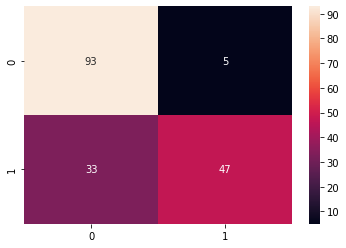

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
#import matplotlib.pyplot as plt
import pandas as pd

y_test_class = y_test
y_pred_class = model.predict(X_test) 
y_pred_class= np.int8(y_pred_class>0.5)

# Cálculo de las métricas 
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# Visualización de la matriz de confusion en un mapa de calor
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

# **Ejercicio regresión**

##**Dataset**

In [ ]:
df2 = pd.read_csv('Concrete_Data (1).csv', sep= ';', names= ['Cement', 'Blast Furnace', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Concrete Compressive'])

In [ ]:
df2.head()

,Cement,Blast Furnace,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete Compressive
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
sns.pairplot(df2)

In [ ]:
df2.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 1 to 1030
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Cement                1030 non-null   object
 1   Blast Furnace         1030 non-null   object
 2   Fly Ash               1030 non-null   object
 3   Water                 1030 non-null   object
 4   Superplasticizer      1030 non-null   object
 5   Coarse Aggregate      1030 non-null   object
 6   Fine Aggregate        1030 non-null   object
 7   Age                   1030 non-null   object
 8   Concrete Compressive  1030 non-null   object
dtypes: object(9)
memory usage: 72.6+ KB


<ipython-input-23-759f7bf2d03e>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df2.info(verbose=True,null_counts=True)


In [ ]:
#df2= df2.apply(lambda x: x.str.replace(',','.'))

In [ ]:
#Separar target y datos de entrenamiento
X2 = df2.drop(columns='Concrete Compressive').values
print(X2.shape)
y2 = df2['Concrete Compressive'].values
print(y2.shape)

(1030, 8)
(1030,)


In [ ]:
#Normalización datos
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_norm2 = scaler.fit_transform(X2)

In [ ]:
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2 = train_test_split(X_norm2,y2,test_size=0.2)
print(type(X_train2))
print(X_train2.shape)

<class 'numpy.ndarray'>
(824, 8)


##**Modelo**

In [ ]:
def Secuential_model2():
  model = Sequential()
  model.add(Dense(64, input_dim = 8, activation = 'relu'))
  model.add(Dense(64, activation = 'relu'))
  model.add(Dense(40, activation = 'relu'))  
  model.add(Dense(1))

  model.summary()
  #optimizer = tf.keras.optimizers.RMSprop(0.0099)
  optimizer = 'adam'
  model.compile(optimizer = optimizer, loss ='mean_squared_error', metrics = ['mse', 'mae'])

  return model

In [ ]:
model2= Secuential_model2()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 64)                576       
                                                                 
 dense_42 (Dense)            (None, 64)                4160      
                                                                 
 dense_43 (Dense)            (None, 40)                2600      
                                                                 
 dense_44 (Dense)            (None, 1)                 41        
                                                                 
Total params: 7,377
Trainable params: 7,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model2.fit(X_train2, y_train2, validation_split=0.2, epochs=200)

Epoch 1/200
21/21 [==============================] - 1s 13ms/step - loss: 1510.2557 - mse: 1510.2557 - mae: 35.3017 - val_loss: 1468.4746 - val_mse: 1468.4746 - val_mae: 34.4647
Epoch 2/200
21/21 [==============================] - 0s 5ms/step - loss: 1342.4597 - mse: 1342.4597 - mae: 32.8439 - val_loss: 1170.6265 - val_mse: 1170.6265 - val_mae: 29.9323
Epoch 3/200
21/21 [==============================] - 0s 5ms/step - loss: 853.9039 - mse: 853.9039 - mae: 24.5379 - val_loss: 478.4066 - val_mse: 478.4066 - val_mae: 17.4986
Epoch 4/200
21/21 [==============================] - 0s 5ms/step - loss: 286.1733 - mse: 286.1733 - mae: 13.3574 - val_loss: 259.5273 - val_mse: 259.5273 - val_mae: 13.2661
Epoch 5/200
21/21 [==============================] - 0s 6ms/step - loss: 234.1024 - mse: 234.1024 - mae: 12.3666 - val_loss: 218.3138 - val_mse: 218.3138 - val_mae: 12.1280
Epoch 6/200
21/21 [==============================] - 0s 5ms/step - loss: 201.2758 - mse: 201.2758 - mae: 11.4343 - val_loss: 1

In [ ]:
model2.evaluate(X_test2,y_test2)

7/7 [==============================] - 0s 3ms/step - loss: 34.1164 - mse: 34.1164 - mae: 4.2884


[34.11643981933594, 34.11643981933594, 4.2884135246276855]

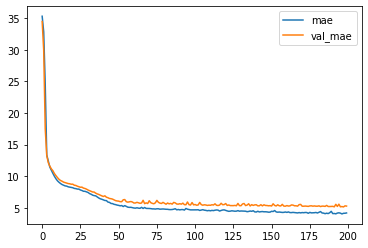

In [ ]:
import matplotlib.pyplot as plt

#plot the loss and validation loss of the dataset
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val_mae')

plt.legend()

In [ ]:
from sklearn.metrics import r2_score
y_train_pred = model2.predict(X_train2).flatten()
r2_score(y_train2,y_train_pred)

26/26 [==============================] - 0s 4ms/step


0.8807853775898076

In [ ]:
from sklearn.metrics import r2_score
y_test_pred = model2.predict(X_test2).flatten()
r2_score(y_test2,y_test_pred)

7/7 [==============================] - 0s 3ms/step


0.893005076861722

[]

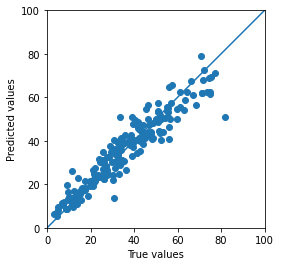

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(y_test2, y_test_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.plot([0, 100], [0, 100])
plt.plot()